In [4]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [12]:

tableau = [ 
    
    [2235215,	2243072,	2478855,	1060452,	315137,	89830,	27208,	1006],
    [2062651,	2501212,	3343839,	1494711,	382833,	92942,	29198,	940],
    [2434046,	2915136,	4122650,	1834485,	450623,	117793,	36153,	1050],
    [2744868,	3505582,	5332111,	2088694,	498991,	134070,	42928,	1143],
    [3697753,	3447415,	6001107,	2283971,	556912,	143404,	42140,	1389],
    [3342198,	4024000,	6700942,	2355430,	621180,	159468,	50430,	1334],
    [3755127,	4491596,	7083475,	2655470,	689982,	172673,	61316,	1602],
    [3361751,	4886234,	7893841,	3297149,	818081,	207809,	64547,	2422],
    [4072073,	5268652,	7967913,	3227014,	881316,	256440,	81492,	2668],
    [4380047,	5281419,	7999189,	3406773,	1418921,	378683,	113785,	2450],
    [4367799,	5667490,	9247761,	4071428,	1165658,	347905,	107404,	2942],
    [4639111,	6302843,	9457566,	3585089,	1056117,	309188,	104971,	3696]
]

tableau = np.array(tableau)

tableau = np.transpose(tableau)
print(tableau)

[[2235215 2062651 2434046 2744868 3697753 3342198 3755127 3361751 4072073
  4380047 4367799 4639111]
 [2243072 2501212 2915136 3505582 3447415 4024000 4491596 4886234 5268652
  5281419 5667490 6302843]
 [2478855 3343839 4122650 5332111 6001107 6700942 7083475 7893841 7967913
  7999189 9247761 9457566]
 [1060452 1494711 1834485 2088694 2283971 2355430 2655470 3297149 3227014
  3406773 4071428 3585089]
 [ 315137  382833  450623  498991  556912  621180  689982  818081  881316
  1418921 1165658 1056117]
 [  89830   92942  117793  134070  143404  159468  172673  207809  256440
   378683  347905  309188]
 [  27208   29198   36153   42928   42140   50430   61316   64547   81492
   113785  107404  104971]
 [   1006     940    1050    1143    1389    1334    1602    2422    2668
     2450    2942    3696]]


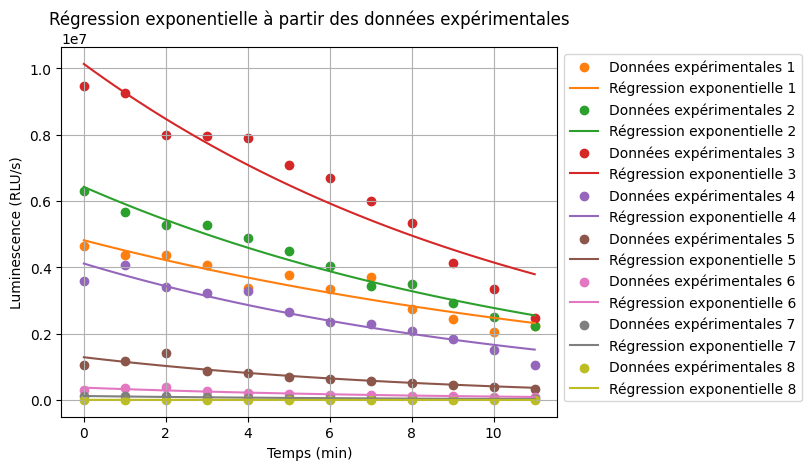

Temps = [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [13]:

def exponential_func(x, a, b):
    return a * np.exp(b * x)

def fit_and_plot_exp(tableau):
    # Initialisations
    a_opts = []
    b_opts = []
    r2_exp = []
    liste_predictions = []

    # Définition des valeurs de temps
    for liste in tableau:
        longueur_liste = len(liste)
        temps = list(range(longueur_liste-1, -1, -1))
        
    # Stockage des concentrations
    concentrations = tableau[:len(tableau)]

    # Régression exponentielle pour les 8 concentrations
    for i in range(0, len(tableau)):
        concentration = concentrations[i]  
        # Régression exponentielle
        popt, pcov = curve_fit(exponential_func, temps, concentration)
        a_opt, b_opt = popt

        # Données pour la courbe ajustée
        x_fit = np.linspace(min(temps), max(temps))
        y_fit = exponential_func(x_fit, *popt) #L'étoile veut dire qu'on prend les deux paramètres du tuple et qu'on les passe en argument de la fonction exp

    
        # Données brutes
        plt.scatter(temps, concentration, color=f'C{i+1}', label=f'Données expérimentales {i+1}')

        # Courbe ajustée
        plt.plot(x_fit, y_fit, '-', color=f'C{i+1}', label=f'Régression exponentielle {i+1}')

        a_opts.append(a_opt)
        b_opts.append(b_opt)
   
    for i in range(len(tableau)):
        concentration = concentrations[i]
        popt, _ = curve_fit(exponential_func, temps, concentration)
        y_fit = exponential_func(np.array(temps), *popt)
        r2 = r2_score(concentration, y_fit)
        r2_exp.append(r2)

        liste_predictions.append(y_fit)

    plt.grid(True)
    plt.xlabel('Temps (min)')
    plt.ylabel('Luminescence (RLU/s)')
    plt.title('Régression exponentielle à partir des données expérimentales')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))    
    plt.show()

    return  temps, a_opts, b_opts, r2_exp, liste_predictions

temps, a_opts, b_opts, r2_exp, y_fit_exp = fit_and_plot_exp(tableau)


In [14]:
for i in range(0,len(tableau)):
    print(f"Le paramètre de détermination R² pour la concentration_{i+1} est égal à : {r2_exp[i]*100} %" )
print("")

tab = [a_opts,b_opts]
for i in range(0,len(tableau)):
    print(f"Les paramètres optimaux pour la concentration_{i+1} sont égaux à : a_opt = {a_opts[i]}, b_opt = {b_opts[i]}")

Le paramètre de détermination R² pour la concentration_1 est égal à : 88.49167995122598 %
Le paramètre de détermination R² pour la concentration_2 est égal à : 96.85174944915191 %
Le paramètre de détermination R² pour la concentration_3 est égal à : 90.50995622024006 %
Le paramètre de détermination R² pour la concentration_4 est égal à : 90.97639515740329 %
Le paramètre de détermination R² pour la concentration_5 est égal à : 82.89711990846966 %
Le paramètre de détermination R² pour la concentration_6 est égal à : 87.43309645666764 %
Le paramètre de détermination R² pour la concentration_7 est égal à : 92.68956792855394 %
Le paramètre de détermination R² pour la concentration_8 est égal à : 94.79730704954268 %

Les paramètres optimaux pour la concentration_1 sont égaux à : a_opt = 4813322.404617222, b_opt = -0.06649578905805119
Les paramètres optimaux pour la concentration_2 sont égaux à : a_opt = 6421770.796549848, b_opt = -0.08402732377993823
Les paramètres optimaux pour la concentra

In [19]:
def export_exp(nom_fichier,tab, r2):
 
    # Écriture des données dans le fichier CSV
    with open(nom_fichier, mode='w', newline='') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(["a et b"])
        writer.writerows(tab)

        writer.writerow(["R2"])
        for val in r2 :    
            writer.writerow([val])

    print("Exportation des données terminée.")

export_exp("donnees_koff.csv", tab, r2_exp)

Exportation des données terminée.


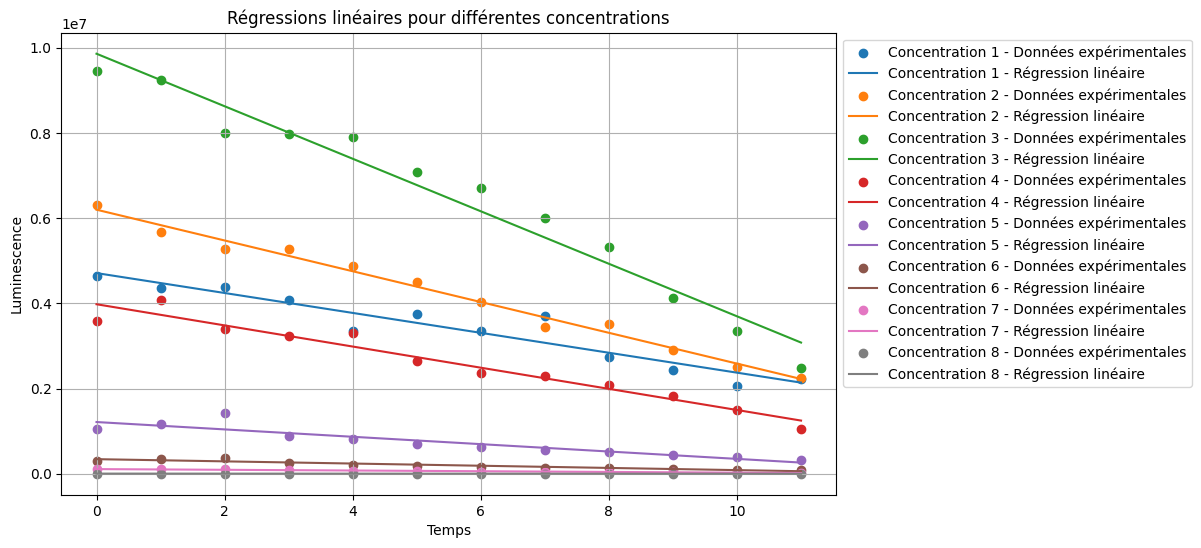

In [16]:
def fit_and_plot_lin(tableau): 
    liste_predictions = []

    for liste in tableau:
        longueur_liste = len(liste)
        temps = list(range(longueur_liste-1, -1, -1))
    x_fit = np.array(temps).reshape(-1, 1)
    concentrations = tableau[:len(tableau)]  
    coefficients_directeurs = []
    r2 = []

    plt.figure(figsize=(10, 6))

    for i, concentration in enumerate(concentrations):
        # Modèle de régression linéaire
        modele = LinearRegression()
        modele.fit(x_fit, concentration)
        predictions = modele.predict(x_fit)

        # Extraction des coefficients directeurs
        coefficient_directeur = modele.coef_[0]
        coefficients_directeurs.append(coefficient_directeur)
    
        liste_predictions.append(predictions)

        # Données et régression linéaire pour chaque concentration
        plt.scatter(x_fit, concentration, label=f'Concentration {i+1} - Données expérimentales')
        plt.plot(x_fit, predictions, linestyle='-', label=f'Concentration {i+1} - Régression linéaire')

        r2.append(r2_score(concentration, predictions))

    plt.grid(True)
    plt.xlabel('Temps')
    plt.ylabel('Luminescence')
    plt.title('Régressions linéaires pour différentes concentrations')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    return r2, coefficients_directeurs, liste_predictions

r2_lin, coefficients_directeurs, y_fit_lin = fit_and_plot_lin(tableau)


In [17]:
for i in range(0,len(tableau)):
    print(f"Le paramètre de détermination R² pour la concentration_{i+1} est égal à : {r2_lin[i]*100} %" )

Le paramètre de détermination R² pour la concentration_1 est égal à : 90.80867815887265 %
Le paramètre de détermination R² pour la concentration_2 est égal à : 98.80544735897251 %
Le paramètre de détermination R² pour la concentration_3 est égal à : 96.30673993827553 %
Le paramètre de détermination R² pour la concentration_4 est égal à : 95.11219941084612 %
Le paramètre de détermination R² pour la concentration_5 est égal à : 84.36932225730646 %
Le paramètre de détermination R² pour la concentration_6 est égal à : 86.49036154754276 %
Le paramètre de détermination R² pour la concentration_7 est égal à : 91.22168319485837 %
Le paramètre de détermination R² pour la concentration_8 est égal à : 89.28613452227015 %


In [20]:
def export_lin(nom_fic, coefficients_directeurs, r2):

    # Combinaison des données coefficient et r2 en paires
    donnees_combinees = zip(coefficients_directeurs, r2)

    # Écriture des données dans le fichier CSV
    with open(nom_fic, mode='w', newline='') as fichier_csv:
        writer = csv.writer(fichier_csv)
    
        # Écrire l'en-tête du fichier CSV
        writer.writerow(['Coefficient', 'R2'])
    
        # Écrire les données combinées dans le fichier CSV
        writer.writerows(donnees_combinees)

    print("Exportation des données terminée.")

export_lin("donnees_koff_lineaire.csv", coefficients_directeurs, r2_lin) 


Exportation des données terminée.
